### Realtime Object Detection

Detects objects in realtime video streaming via webcam

#### Import libraries for preprocessing and annotation

In [29]:
import numpy as np
import cv2
from pathlib import Path
from IPython.display import Image
import torch

#### Load pretrained models

In [30]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

Using cache found in C:\Users\asus/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-9-5 Python-3.10.10 torch-1.13.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


#### Run object detection on example image

In [31]:
imgs = 'image1.jpg'
Image(url=imgs)

In [36]:
# set model parameters
model.conf = 0.25  # NMS confidence threshold
#model.iou = 0.45  # NMS IntersectionOverUnion threshold
#model.agnostic = False  # NMS class-agnostic
#model.multi_label = False  # NMS multiple labels per box
#model.max_det = 1000  # maximum number of detections per image

results = model(imgs)
results.print()
results.save()

image 1/1: 563x1000 14 persons, 4 cars, 2 buss, 1 truck, 1 traffic light, 1 tv
Speed: 27.0ms pre-process, 256.0ms inference, 2.0ms NMS per image at shape (1, 3, 384, 640)
Saved 1 image to runs\detect\exp


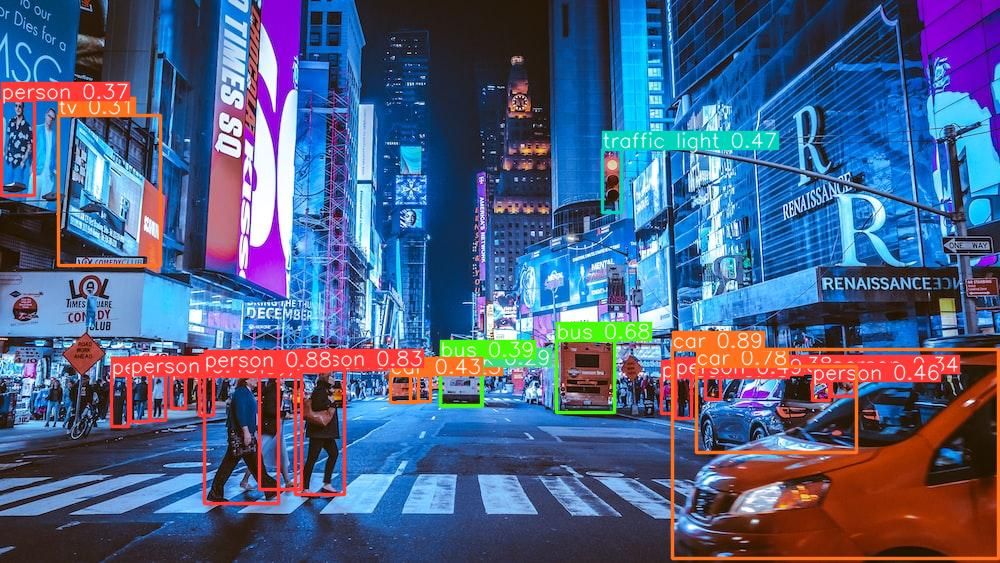

In [37]:
Image(filename='runs/detect/exp/image1.jpg') 

#### Run object detection on realtime video via webcam

In [8]:
cap = cv2.VideoCapture(0)
while True:
    ret, image_np = cap.read()
    results = model(image_np)
    df_result = results.pandas().xyxy[0]
    dict_result = df_result.to_dict()
    scores = list(dict_result["confidence"].values())
    labels = list(dict_result["name"].values())
    
    list_boxes = list()
    for dict_item in df_result.to_dict('records'):
        list_boxes.append(list(dict_item.values())[:4])
    count = 0
    
    for xmin, ymin, xmax, ymax in list_boxes:
        image_np = cv2.rectangle(image_np, pt1=(int(xmin),int(ymin)), pt2=(int(xmax),int(ymax)), \
                                 color=(255,0, 0), thickness=2)
        cv2.putText(image_np, f"{labels[count]}: {round(scores[count], 2)}", (int(xmin), int(ymin)-10), \
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
        count = count + 1
        
    cv2.imshow('Object Detector', image_np);
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break